In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [ ]:
dataset = pd.read_csv(r'/content/drive/MyDrive/ML/Stock Market/21-03-2019-TO-19-03-2021IOC.csv')

In [ ]:
dataset.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Volume,Unnamed: 11,Unnamed: 12,Unnamed: 13,% Dly Qt to Traded Qty
0,IOC,BL,22-Mar-19,511.15,159.0,159.00,159.0,159.00,159.00,159.00,1821855,NaN,NaN,NaN,100.00
1,IOC,EQ,22-Mar-19,159.00,158.8,161.25,155.1,155.25,157.05,157.71,31011781,NaN,NaN,NaN,57.44
2,IOC,EQ,25-Mar-19,157.05,157.0,165.90,155.0,164.15,164.35,161.21,23685632,NaN,NaN,NaN,37.61
3,IOC,EQ,26-Mar-19,164.35,165.1,169.75,160.5,161.95,161.80,165.08,26397138,NaN,NaN,NaN,41.26
4,IOC,EQ,27-Mar-19,161.80,162.0,163.70,160.4,161.15,161.45,161.81,10666251,NaN,NaN,NaN,36.10


In [ ]:
dataset.isna().any()

Symbol                    False
Series                    False
Date                      False
Prev Close                False
Open Price                False
High Price                False
Low Price                 False
Last Price                False
Close Price               False
Average Price             False
Volume                    False
Unnamed: 11                True
Unnamed: 12                True
Unnamed: 13                True
% Dly Qt to Traded Qty    False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  496 non-null    object 
 1   Series                  496 non-null    object 
 2   Date                    496 non-null    object 
 3   Prev Close              496 non-null    float64
 4   Open Price              496 non-null    float64
 5   High Price              496 non-null    float64
 6   Low Price               496 non-null    float64
 7   Last Price              496 non-null    float64
 8   Close Price             496 non-null    float64
 9   Average Price           496 non-null    float64
 10  Volume                  496 non-null    int64  
 11  Unnamed: 11             0 non-null      float64
 12  Unnamed: 12             0 non-null      float64
 13  Unnamed: 13             0 non-null      float64
 14  % Dly Qt to Traded Qty  496 non-null    fl

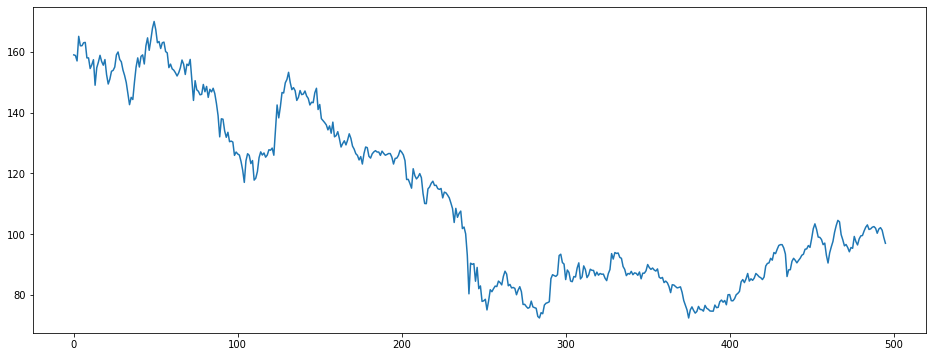

In [ ]:
dataset['Open Price'].plot(figsize=(16,6))

In [ ]:
dataset.rolling(7).mean().head(20)

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Volume,Unnamed: 11,Unnamed: 12,Unnamed: 13,% Dly Qt to Traded Qty
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,210.871429,160.985714,164.114286,158.935714,160.942857,161.114286,161.405714,2.105403e+07,NaN,NaN,NaN,53.450000
7,161.114286,161.571429,164.800000,158.621429,160.900000,161.071429,161.361429,2.367585e+07,NaN,NaN,NaN,46.041429
8,161.071429,161.457143,164.607143,158.900000,161.371429,161.228571,161.484286,2.080319e+07,NaN,NaN,NaN,44.450000
9,161.228571,161.600000,163.714286,158.614286,159.842857,159.671429,160.647143,1.892959e+07,NaN,NaN,NaN,46.041429


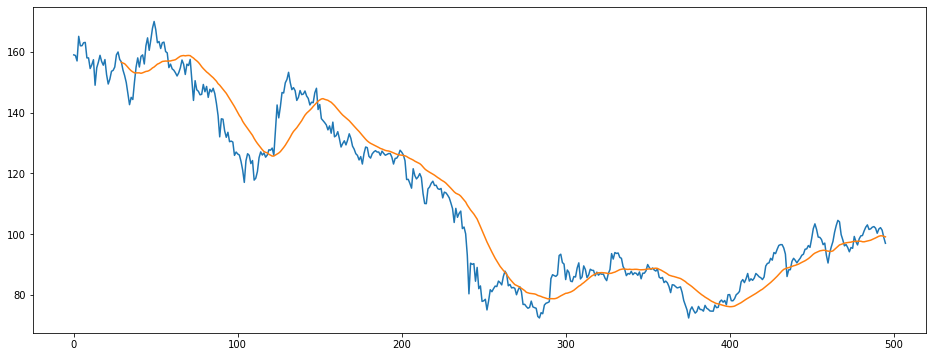

In [ ]:
dataset['Open Price'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close Price'].plot()

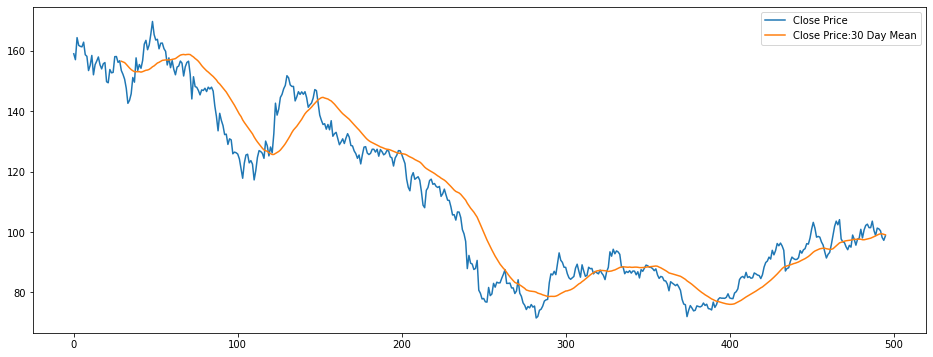

In [ ]:
dataset['Close Price:30 Day Mean'] = dataset['Close Price'].rolling(window=30).mean()
dataset[['Close Price','Close Price:30 Day Mean']].plot(figsize=(16,6))

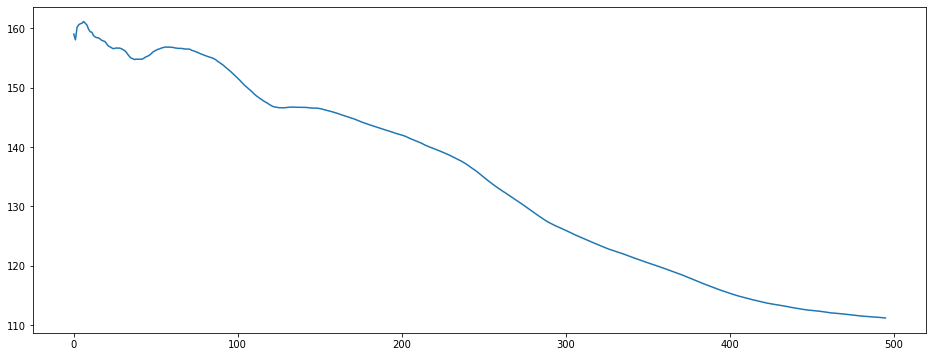

In [ ]:
dataset['Close Price'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [ ]:
training_set=dataset['Open Price']
training_set=pd.DataFrame(training_set)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)


In [ ]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60,496):
  x_train.append(training_set_scaled[i-60:i, 0 ])
  y_train.append(training_set_scaled[i , 0])
x_train,y_train = np.array(x_train), np.array(y_train)

#Reshaping
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
 # Part 2 =Building the RNN
 # Importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
# from keras.models impfrom keras.models import Dropout

In [ ]:
# Initialising the RNN
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences= True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

#adding Second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units= 50 , return_sequences= True))
regressor.add(Dropout(0.2))

#adding Third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units= 50 , return_sequences= True))
regressor.add(Dropout(0.2))

#adding fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units= 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))


In [ ]:
#Compling the RNN
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')

# Fitting the RNN to the the Traing set
regressor.fit(x_train,y_train,epochs = 100 , batch_size = 32)

Epoch 1/100
14/14 [==============================] - 9s 116ms/step - loss: 0.0688
Epoch 2/100
14/14 [==============================] - 2s 117ms/step - loss: 0.0209
Epoch 3/100
14/14 [==============================] - 2s 116ms/step - loss: 0.0119
Epoch 4/100
14/14 [==============================] - 2s 117ms/step - loss: 0.0112
Epoch 5/100
14/14 [==============================] - 2s 114ms/step - loss: 0.0097
Epoch 6/100
14/14 [==============================] - 2s 115ms/step - loss: 0.0078
Epoch 7/100
14/14 [==============================] - 2s 118ms/step - loss: 0.0081
Epoch 8/100
14/14 [==============================] - 2s 115ms/step - loss: 0.0076
Epoch 9/100
14/14 [==============================] - 2s 120ms/step - loss: 0.0084
Epoch 10/100
14/14 [==============================] - 2s 115ms/step - loss: 0.0074
Epoch 11/100
14/14 [==============================] - 2s 117ms/step - loss: 0.0068
Epoch 12/100
14/14 [==============================] - 2s 117ms/step - loss: 0.0065
Epoch 13/100


In [ ]:
# Part-3 Making the predictions and visulising the results

dataset_test = pd.read_csv('/content/drive/MyDrive/ML/Stock Market/21-03-2019-TO-19-03-2021IOC.csv' , index_col="Date" , parse_dates=True)

In [ ]:
real_stock_price = dataset_test.iloc[: , 1:2].values

In [ ]:
dataset_test.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Volume,Unnamed: 11,Unnamed: 12,Unnamed: 13,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2019-03-22,IOC,BL,511.15,159.0,159.00,159.0,159.00,159.00,159.00,1821855,NaN,NaN,NaN,100.00
2019-03-22,IOC,EQ,159.00,158.8,161.25,155.1,155.25,157.05,157.71,31011781,NaN,NaN,NaN,57.44
2019-03-25,IOC,EQ,157.05,157.0,165.90,155.0,164.15,164.35,161.21,23685632,NaN,NaN,NaN,37.61
2019-03-26,IOC,EQ,164.35,165.1,169.75,160.5,161.95,161.80,165.08,26397138,NaN,NaN,NaN,41.26
2019-03-27,IOC,EQ,161.80,162.0,163.70,160.4,161.15,161.45,161.81,10666251,NaN,NaN,NaN,36.10


In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2019-03-22 to 2021-03-19
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  496 non-null    object 
 1   Series                  496 non-null    object 
 2   Prev Close              496 non-null    float64
 3   Open Price              496 non-null    float64
 4   High Price              496 non-null    float64
 5   Low Price               496 non-null    float64
 6   Last Price              496 non-null    float64
 7   Close Price             496 non-null    float64
 8   Average Price           496 non-null    float64
 9   Volume                  496 non-null    int64  
 10  Unnamed: 11             0 non-null      float64
 11  Unnamed: 12             0 non-null      float64
 12  Unnamed: 13             0 non-null      float64
 13  % Dly Qt to Traded Qty  496 non-null    float64
dtypes: float64(11), int64(1

In [ ]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',','').astype(float)

AttributeError: ignored

In [ ]:
test_set=dataset_test['Open Price']
test_set=pd.DataFrame(test_set)

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2019-03-22 to 2021-03-19
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open Price  496 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB


In [ ]:
#Getting the predictd stock price 
dataset_total = pd.concat((dataset['Open Price'], dataset_test['Open Price']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,400):
  x_test.append(inputs[i-60:i, 0 ])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predictd_stock_price=regressor.predict(x_test)
predictd_stock_price= sc.inverse_transform(predictd_stock_price)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
predictd_stock_price=pd.DataFrame(predictd_stock_price)
predictd_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       340 non-null    float32
dtypes: float32(1)
memory usage: 1.5 KB


TypeError: ignored

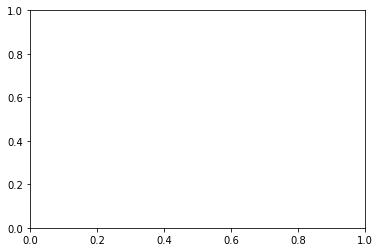

In [ ]:
#Visualising the result
plt.plot(real_stock_price, color = 'red' , label = 'Real IOC Price')
plt.plot(predictd_stock_price, color = 'blue', label = 'Predicted IOC Price')
plt.title('IOC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IOC Stock Price')
plt.legend()
plt.show()